In [1]:
%pylab inline

import pandas as pd
import feather
import gc
import seaborn as sns
import ipywidgets as widget
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm

plt.style.use("ggplot")
pio.renderers.default = "notebook"
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


# Cargar todos los datos

In [2]:
df = feather.read_dataframe("train_downsampled.feather")
assets = df.investment_id.unique()

In [3]:
def plot_column(df, col = "target"):
    fig = make_subplots(rows = 1, cols = 1)
    fig.add_trace(
        go.Scatter(x = df.time_id, y = df[col]),
        row = 1, col = 1
    )
    fig.update_layout(showlegend=False, xaxis_rangeslider_visible=True)
    fig.show()

In [26]:
@widget.interact
def plot_asset_returns(column = widget.fixed("[investment_id]"), asset = assets):
    asset_df = df.query("investment_id == @asset")
    print("Cantidad de registros para", asset, ";", asset_df.shape[0])
    plot_column(asset_df)

interactive(children=(Dropdown(description='asset', options=(1, 2, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20,…

# Cantidad de mediciones por time_id

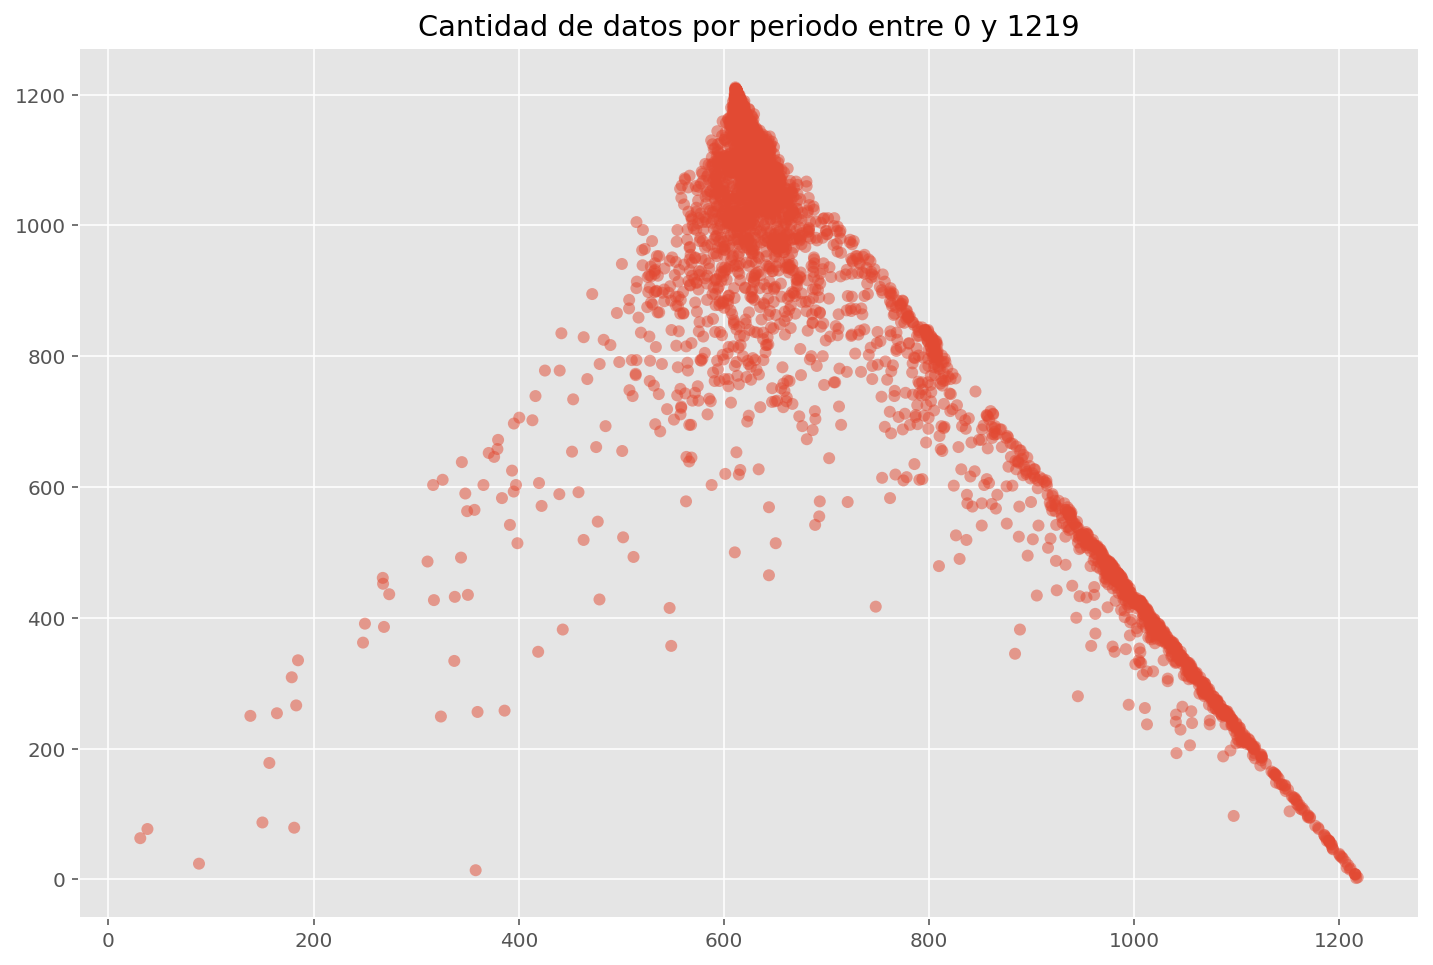

In [4]:
df_temp = df[["time_id", "investment_id"]].copy()

fmin ,fmax = df_temp.time_id.agg([min, max])
df_temp["time_diff"] = df_temp.time_id - fmin

# Agrupar
g = df_temp.groupby(["investment_id"])
plt.figure(figsize = (12, 8))
ax = plt.scatter(g.time_diff.mean(), g.size(), edgecolor = "none", alpha = 0.5)
plt.title(f"Cantidad de datos por periodo entre {fmin} y {fmax}");

In [5]:
del df_temp, g, ax, fmin, fmax; gc.collect();

# Agrupar assets por volatilidad

In [3]:
returns = df[["time_id", "investment_id", "target"]].copy()
returns = pd.pivot_table(returns, 
                         values = "target", 
                         index = "time_id", 
                         columns = "investment_id")
returns

investment_id,0,1,2,3,4,6,7,8,9,10,...,3763,3764,3765,3766,3767,3768,3769,3770,3772,3773
time_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,-0.300875,-0.231040,NaN,NaN,0.568807,-1.064780,-0.531940,1.505904,-0.260731,...,NaN,NaN,0.302557,0.003156,NaN,-0.392297,-0.877746,-0.284696,0.202003,NaN
1,NaN,-0.917045,-0.472108,NaN,NaN,-0.147971,-0.372692,-0.105693,0.622500,-0.400038,...,NaN,NaN,-0.560079,0.250396,1.318857,-0.227782,-0.684049,-0.894825,-0.286612,NaN
2,NaN,-0.480234,-0.661659,NaN,NaN,0.243674,0.318899,-0.260137,-0.610705,-1.030857,...,NaN,NaN,-0.305467,2.031675,-0.040981,-0.018971,-0.250995,-0.323800,0.300915,NaN
3,NaN,-0.323562,-0.055215,NaN,NaN,1.816745,-0.711446,-0.640987,5.271096,-0.636719,...,NaN,NaN,-0.730791,0.857357,0.386379,-0.708491,-0.165561,0.836601,0.076417,NaN
4,NaN,2.494479,0.341267,NaN,NaN,0.470476,-1.581650,-0.592970,NaN,-0.435524,...,NaN,NaN,-0.656495,1.897659,-1.476258,-0.210125,-0.206145,0.126859,-0.387297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0.579622,0.078338,-0.361899,1.624498,0.968079,-0.353440,NaN,-0.665880,-0.344785,-0.818674,...,-0.074509,0.608381,-0.872156,-0.768846,NaN,0.045190,0.227717,-0.811419,0.292205,-0.049360
1216,0.064896,-0.290113,-0.688692,-0.070665,-0.514005,-0.095650,NaN,0.095912,-0.161798,-0.489038,...,0.163917,0.666394,-0.918939,1.095260,NaN,-0.104977,-0.230372,-1.410046,0.651031,0.526346
1217,2.204664,-0.097136,0.007041,1.532567,-0.207239,0.287350,NaN,0.567659,-1.444997,0.313066,...,0.351041,0.511106,0.261462,-0.467051,NaN,0.577800,0.345404,-0.477728,-0.422950,1.492833


## Distribución

Me tinca que deberían ser t-students

### Test de hipótesis: Kolmogorov Smirnov, Lilliefors, Shapiro, t - test

In [43]:
# TODO:
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors

## Estacionariedad

In [56]:
from statsmodels.tsa.stattools import adfuller
from collections import defaultdict

def make_stationary(data: pd.Series, alpha: float = 0.05, max_diff_order: int = 10) -> dict:
    # Test to see if the time series is already stationary
    if adfuller(data)[1] < alpha:
        return {
            'differencing_order': 0,
            'time_series': np.array(data)
        }
    
    # A list to store P-Values
    p_values = []
    
    # Test for differencing orders from 1 to max_diff_order (included)
    for i in range(1, max_diff_order + 1):
        # Perform ADF test
        result = adfuller(data.diff(i).dropna())
        # Append P-value
        p_values.append((i, result[1]))
        
    # Keep only those where P-value is lower than significance level
    significant = [p for p in p_values if p[1] < alpha]
    # Sort by the differencing order
    significant = sorted(significant, key=lambda x: x[0])
    
    # Get the differencing order
    diff_order = significant[0][0]
    
    # Make the time series stationary
    stationary_series = data.diff(diff_order).dropna()
    
    return {
        'differencing_order': diff_order,
        'time_series': np.array(stationary_series)
    }

orders = defaultdict(lambda : "Asset no presente")
dificiles = defaultdict(lambda : "Todas son estacionarias")
for asset in tqdm(assets):
    try:
        orders[asset] = make_stationary(returns[asset].dropna())['differencing_order']
        if orders[asset] > 0: 
            orders[asset]
    except:
        print("No es posible calcular para asset id:", asset)

100%|██████████| 3579/3579 [02:06<00:00, 28.18it/s] 

No es posible calcular para asset id: 905
No es posible calcular para asset id: 1415
No es posible calcular para asset id: 2800


In [60]:
pd.Series(orders).value_counts() # La mayoría es estacionaria

0    3571
1       3
3       1
2       1
dtype: int64

In [63]:
dificiles

{1364: 1, 3598: 1, 2041: 1, 1358: 3, 890: 2}

## Clustering

### Por correlación en la volatidad

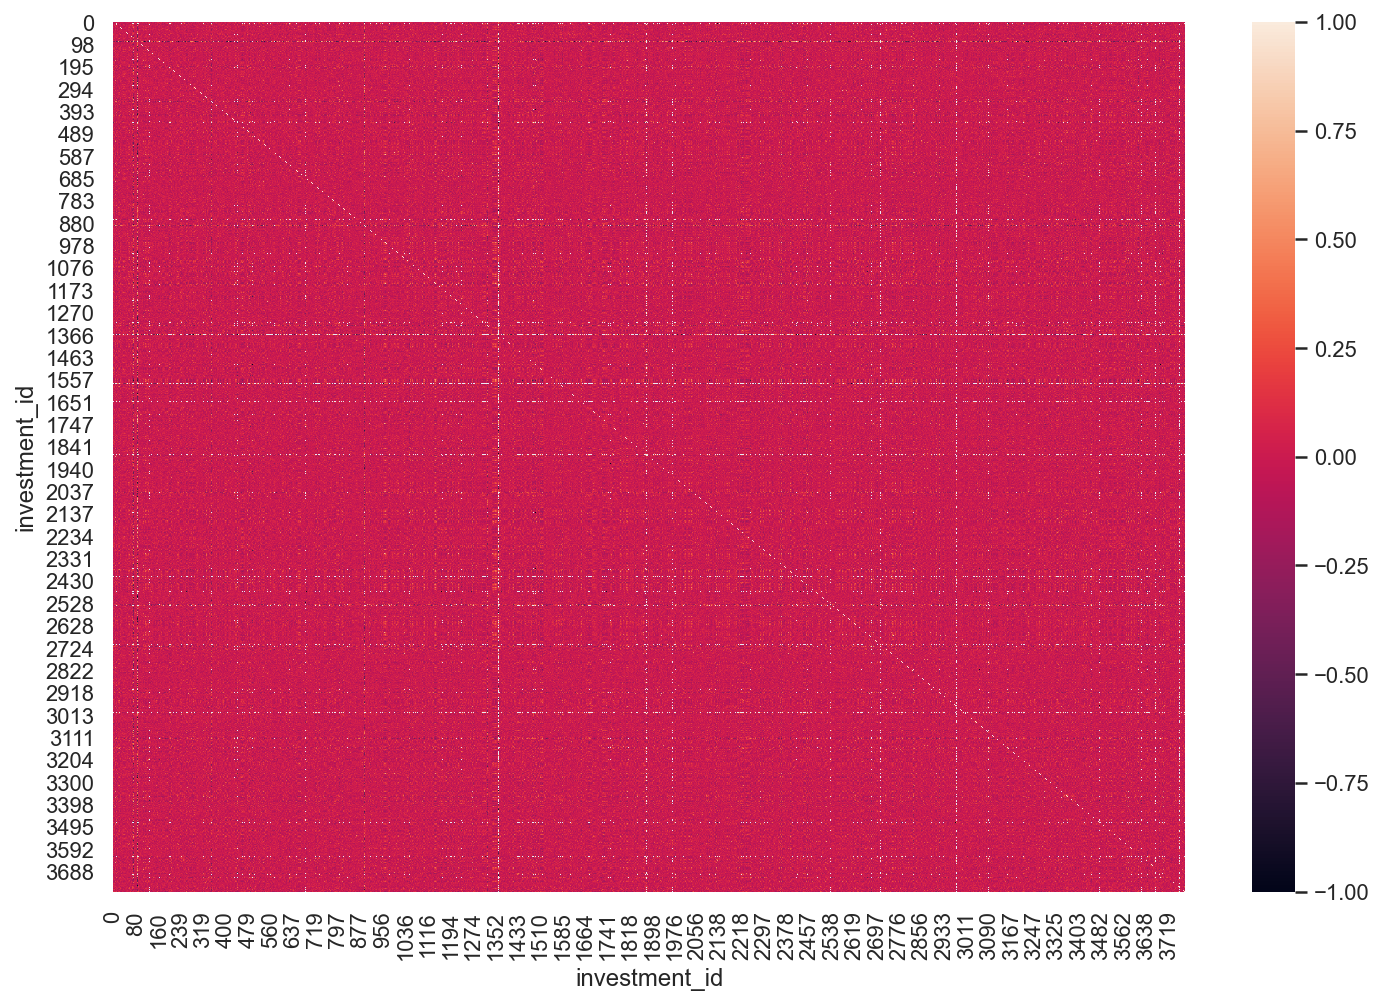

In [4]:
# TODO:
sns.set(rc={'figure.figsize':(12,8)})
returns_corr = returns.corr()
ax = sns.heatmap(returns_corr) # Se ven algunas con alta correlación

In [5]:
# Si no existe data de ambas al mismo tiempo rellenar con ceros
returns_corr.fillna(0, inplace = True)

In [6]:
print("Is NaN:", np.any(np.isnan(returns_corr.values)))
print("Is inf:", np.all(np.isfinite(returns_corr.values)))

Is NaN: False
Is inf: True


In [7]:
# Si la correlación es inf, significa que una stock tiene std = 0
# Así que no deberia afectar a la otra stock
returns_corr.replace([np.inf, - np.inf], 0, inplace = True)

In [8]:
print("Is NaN:", np.any(np.isnan(returns_corr.values)))
print("Is finite:", np.all(np.isfinite(returns_corr.values)))

Is NaN: False
Is finite: True


In [9]:
### 1. calcualte the distane between stocks (This is common in finance. np.sqrt(2 * (1 - /rho)))
### 2. agglomerative clustering by distance matrix (use default euclidean distance and ward linkage)
from sklearn.cluster import AgglomerativeClustering

dist = np.sqrt(2 * (1 - returns_corr))
dist.replace([np.nan, np.inf, -np.inf], 0, inplace = True)
print("Is NaN:", np.any(np.isnan(dist.to_numpy())))
print("Is finite:", np.all(np.isfinite(dist.to_numpy())))

clustering = AgglomerativeClustering(n_clusters=3).fit(dist)
stocksyms = dist.index.values

stock_clusters = pd.DataFrame({'Symbol':stocksyms, 'Cluster':clustering.labels_})

stock_clusters

/tmp/ipykernel_150805/2114747541.py:5: RuntimeWarning:

invalid value encountered in sqrt



Is NaN: False
Is finite: True


,Symbol,Cluster
0,0,1
1,1,2
2,2,0
3,3,2
4,4,1
...,...,...
3574,3768,2
3575,3769,0
3576,3770,2
3577,3772,2


In [10]:
cls0 = stock_clusters[stock_clusters['Cluster'] == 0]['Symbol']
cls1 = stock_clusters[stock_clusters['Cluster'] == 1]['Symbol']
cls2 = stock_clusters[stock_clusters['Cluster'] == 2]['Symbol']

cls0RetDf = returns.loc[:,cls0]
cls1RetDf = returns.loc[:,cls1]
cls2RetDf = returns.loc[:,cls2]

cls0Ret = cls0RetDf.mean(axis=1)
cls1Ret = cls1RetDf.mean(axis=1)
cls2Ret = cls2RetDf.mean(axis=1)

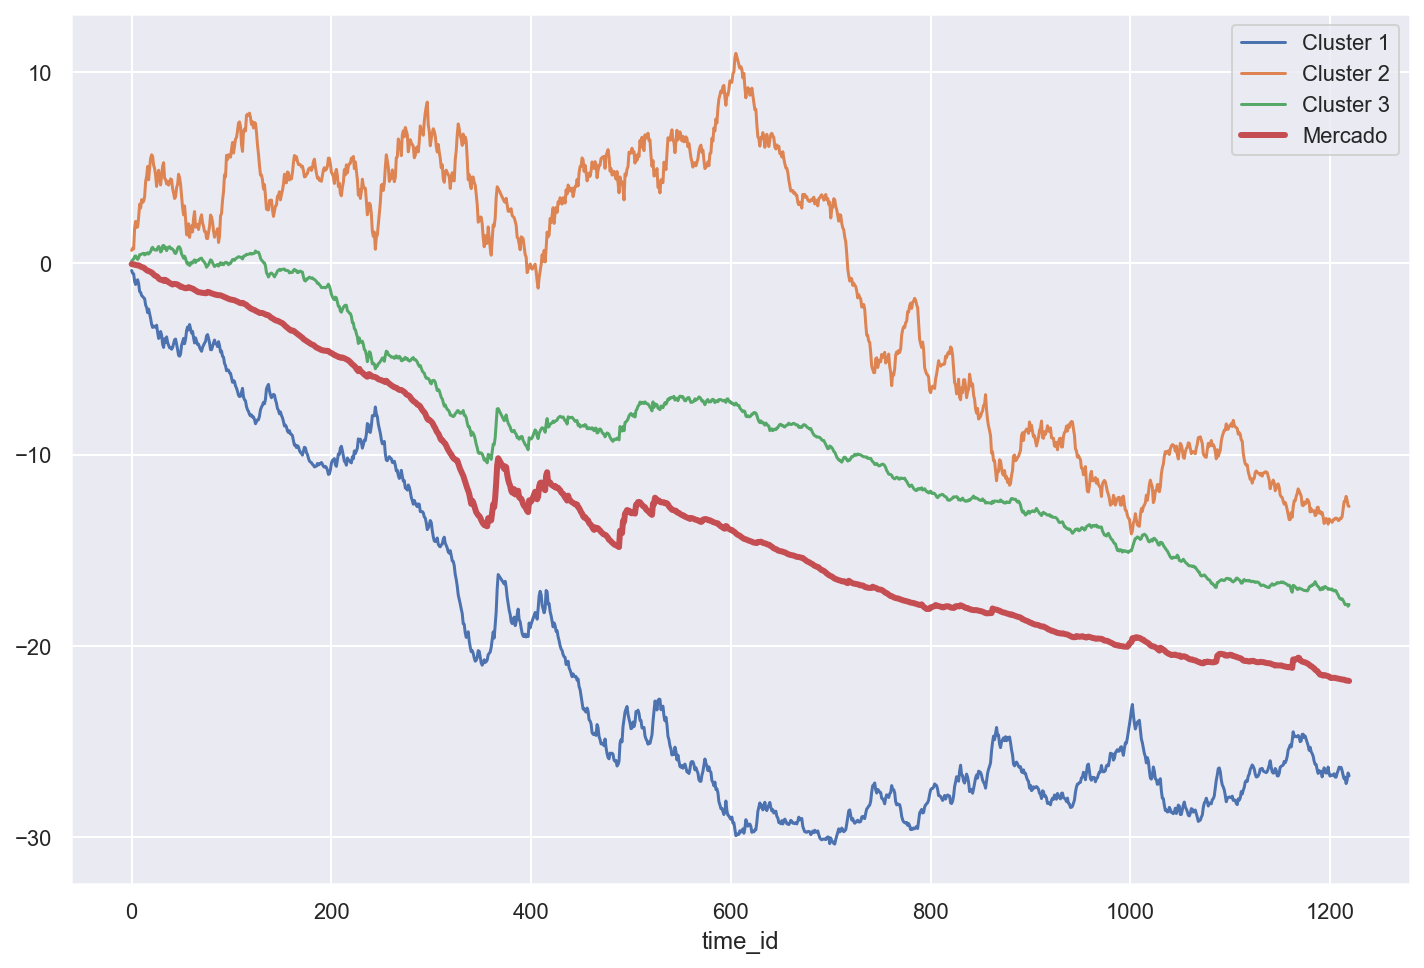

In [17]:
cls0Ret.cumsum().plot()
cls1Ret.cumsum().plot()
cls2Ret.cumsum().plot()
returns.mean(axis=1).cumsum().plot(figsize = (12, 8), lw = 3)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Mercado']);